# DAVID Analysis of DEGs between ensemble risk groups (present in all repeats)

## Note* EASE threshold of 0.01 and count threshold of 10 was used

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import textwrap

In [2]:
df_GO_KEGG = pd.read_csv("./DAVID_UP_GO-Direct.csv")

BP_df = df_GO_KEGG[df_GO_KEGG["Category"] == "GOTERM_BP_DIRECT"]
BP_df = BP_df[BP_df["FDR"]<=0.01]
BP_df["-Log10(FDR)"] = -np.log10(BP_df["FDR"])
BP_df.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

CC_df = df_GO_KEGG[df_GO_KEGG["Category"] == "GOTERM_CC_DIRECT"]
CC_df = CC_df[CC_df["FDR"]<=0.01]
CC_df["-Log10(FDR)"] = -np.log10(CC_df["FDR"])
CC_df.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

MF_df = df_GO_KEGG[df_GO_KEGG["Category"] == "GOTERM_MF_DIRECT"]
MF_df = MF_df[MF_df["FDR"]<=0.01]
MF_df["-Log10(FDR)"] = -np.log10(MF_df["FDR"])
MF_df.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

C:\Users\ottoc\AppData\Local\Temp\ipykernel_32036\2553145791.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


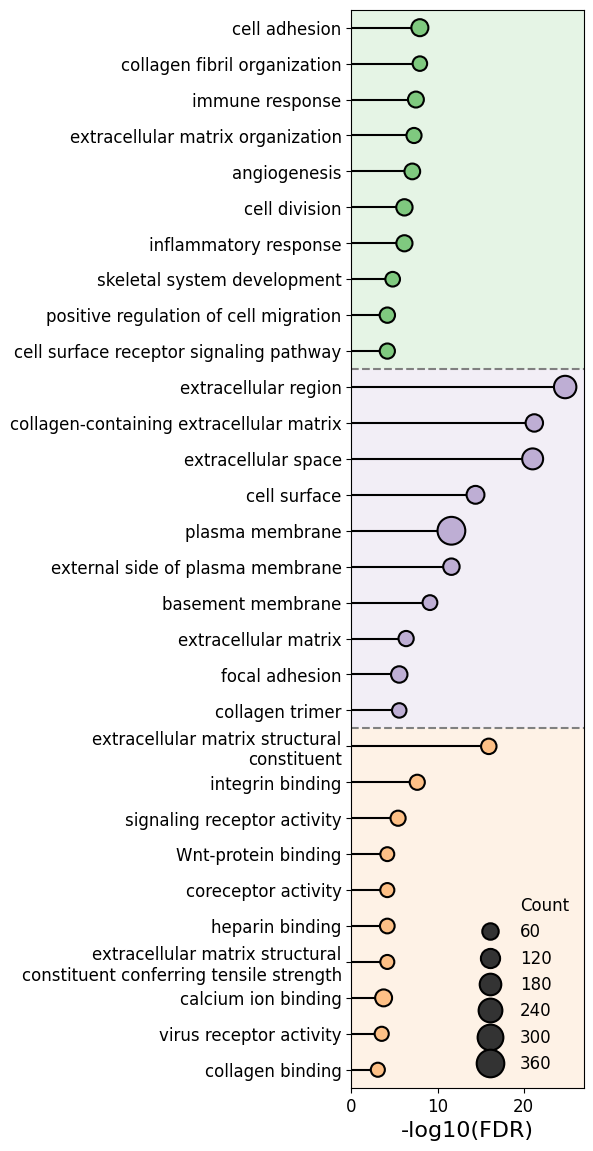

In [66]:
GO_df = pd.concat([BP_df[:10],CC_df[:10],MF_df[:10]])
GO_df.replace({"GOTERM_BP_DIRECT":"BP","GOTERM_CC_DIRECT":"CC","GOTERM_MF_DIRECT":"MF"},inplace=True)
ax = plt.figure(figsize=(3,14))
ax = sns.barplot(GO_df,y="Term",x="-Log10(FDR)",width=0,color="black",legend=False,linewidth=1.5,edgecolor="black",zorder=1)
ax = sns.scatterplot(GO_df,y="Term",x="-Log10(FDR)",size="Count",sizes=(100,400),edgecolor="black",hue="Category",palette='Accent',linewidth=1.5,zorder=1)
ax.set_ylabel("")
ax.set_xlabel("-log10(FDR)",fontsize=16)
ax.add_patch(patches.Rectangle((0,-0.5),27,10,facecolor="#7FC97F",alpha=0.2,zorder=0))
ax.add_patch(patches.Rectangle((0,9.5),27,10,facecolor="#BEAED4",alpha=0.2,zorder=0))
ax.add_patch(patches.Rectangle((0,19.5),27,10,facecolor="#FDC086",alpha=0.2,zorder=0))
ax.tick_params(axis="both",labelsize=12)
labels = [textwrap.fill(t.get_text(), 40) for t in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.margins(0)
plt.axhline(y=9.5,color="grey",linestyle='--',zorder=0)
plt.axhline(y=19.5,color="grey",linestyle='--',zorder=0)
handles, labels = ax.get_legend_handles_labels()
size_start = labels.index("Count")
size_handles = handles[size_start:]
size_labels = labels[size_start:]
plt.legend(handles=size_handles,loc="lower right",frameon=False,fontsize=12)

In [5]:
df_Fat = pd.read_csv("./DAVID_UP_GO-Fat.csv")

BP_df_Fat = df_Fat[df_Fat["Category"] == "GOTERM_BP_FAT"]
BP_df_Fat = BP_df_Fat[BP_df_Fat["FDR"]<=0.01]
BP_df_Fat["-Log10(FDR)"] = -np.log10(BP_df_Fat["FDR"])
BP_df_Fat.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

CC_df_Fat = df_Fat[df_Fat["Category"] == "GOTERM_CC_FAT"]
CC_df_Fat = CC_df_Fat[CC_df_Fat["FDR"]<=0.01]
CC_df_Fat["-Log10(FDR)"] = -np.log10(CC_df_Fat["FDR"])
CC_df_Fat.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

MF_df_Fat = df_Fat[df_Fat["Category"] == "GOTERM_MF_FAT"]
MF_df_Fat = MF_df_Fat[MF_df_Fat["FDR"]<=0.01]
MF_df_Fat["-Log10(FDR)"] = -np.log10(MF_df_Fat["FDR"])
MF_df_Fat.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

['Category', 'BP', 'CC', 'MF', 'Count', '80', '160', '240', '320']


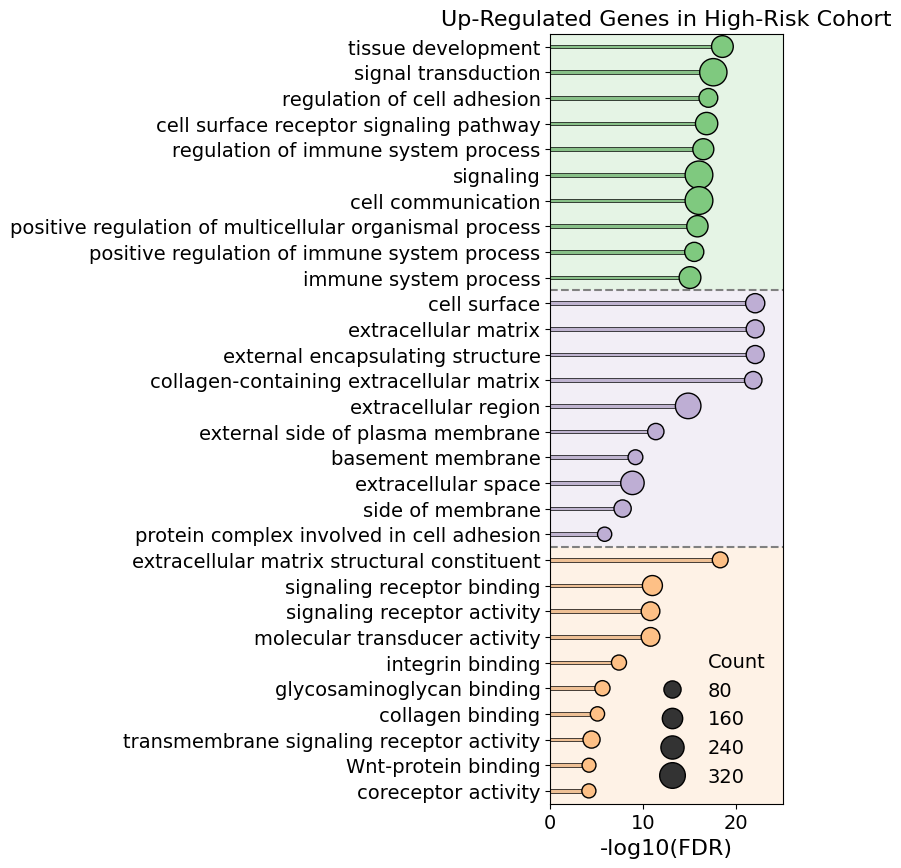

In [30]:
GO_df_Fat = pd.concat([BP_df_Fat[:10],CC_df_Fat[:10],MF_df_Fat[:10]])
GO_df_Fat.replace({"GOTERM_BP_FAT":"BP","GOTERM_CC_FAT":"CC","GOTERM_MF_FAT":"MF"},inplace=True)
ax = plt.figure(figsize=(3,10))
ax = sns.barplot(GO_df_Fat,y="Term",x="-Log10(FDR)",width=0.15,hue="Category",palette='Accent',legend=False,linewidth=0.5,edgecolor="black",zorder=1)
ax = sns.scatterplot(GO_df_Fat,y="Term",x="-Log10(FDR)",size="Count",sizes=(100,400),edgecolor="black",hue="Category",palette='Accent',linewidth=1,zorder=1)
ax.set_ylabel("")
ax.set_xlabel("-log10(FDR)",fontsize=16)
ax.add_patch(patches.Rectangle((0,-0.5),25,10,facecolor="#7FC97F",alpha=0.2,zorder=0))
ax.add_patch(patches.Rectangle((0,9.5),25,10,facecolor="#BEAED4",alpha=0.2,zorder=0))
ax.add_patch(patches.Rectangle((0,19.5),25,10,facecolor="#FDC086",alpha=0.2,zorder=0))
ax.tick_params(axis="both",labelsize=14)
plt.title("Up-Regulated Genes in High-Risk Cohort",fontsize=16)
plt.margins(0)
plt.axhline(y=9.5,color="grey",linestyle='--',zorder=0)
plt.axhline(y=19.5,color="grey",linestyle='--',zorder=0)
handles, labels = ax.get_legend_handles_labels()
size_start = labels.index("Count")
size_handles = handles[size_start:]
size_labels = labels[size_start:]
plt.legend(handles=size_handles,loc="lower right",frameon=False,fontsize=14)
print(labels)